# Preliminary Items

## Imports

In [ ]:
url = 'https://launchpad.net/~mario-mariomedina/+archive/ubuntu/talib/+files'
!wget $url/libta-lib0_0.4.0-oneiric1_amd64.deb -qO libta.deb
!wget $url/ta-lib0-dev_0.4.0-oneiric1_amd64.deb -qO ta.deb
!dpkg -i libta.deb ta.deb
!pip install ta-lib
import talib

Selecting previously unselected package libta-lib0.
(Reading database ... 160983 files and directories currently installed.)
Preparing to unpack libta.deb ...
Unpacking libta-lib0 (0.4.0-oneiric1) ...
Selecting previously unselected package ta-lib0-dev.
Preparing to unpack ta.deb ...
Unpacking ta-lib0-dev (0.4.0-oneiric1) ...
Setting up libta-lib0 (0.4.0-oneiric1) ...
Setting up ta-lib0-dev (0.4.0-oneiric1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Processing triggers for libc-bin (2.27-3ubuntu1.2) ...
/sbin/ldconfig.real: /usr/local/lib/python3.7/dist-packages/ideep4py/lib/libmkldnn.so.0 is not a symbolic link

     |████████████████████████████████| 276kB 22.2MB/s 
  Created wheel for ta-lib: filename=TA_Lib-0.4.19-cp37-cp37m-linux_x86_64.whl size=1437986 sha256=4cd6f168406f6dfe5c6f18bb568c881ce49dfe073aabc97db7662b28eaa39165
  Stored in directory: /root/.cache/pip/wheels/a3/f6/12/3d1ccd06caadd8fa47e016991dd0d27f1163bb260f1854e2ff
Successfully built ta-lib


In [ ]:
import numpy as np
import pandas as pd
import talib

Set random seed

In [ ]:
import random
seed_num = 1234
random.seed(seed_num)

Enable colab pandas interactive displays

In [ ]:
from google.colab import data_table
%load_ext google.colab.data_table

## Mount Google Drive 

In [ ]:
currentWorkingDir = !pwd
defaultWorkingDir = "/content"

if ( currentWorkingDir[0] == defaultWorkingDir ):
  from google.colab import drive

  drive.mount('/content/drive')
      
  %cd "/content/drive/My Drive/Colab Notebooks/stock_portfolio"
else:
  print("Currenting running app from: ")
  !pwd

Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks/stock_portfolio


In [ ]:
%cd "/content/drive/My Drive/Colab Notebooks/stock_portfolio"

/content/drive/My Drive/Colab Notebooks/stock_portfolio


In [ ]:
!pwd

/content/drive/My Drive/Colab Notebooks/stock_portfolio


# Data Modelling

In [ ]:
df_price_history = pd.read_csv("df_price_history.csv")

In [ ]:
df_ccc_raw = df_price_history[df_price_history["Symbol"] == "CCC"]

In [ ]:
df_ccc_raw.columns

Index(['Symbol', 'Date', '52_Week_High', '52_Week_Low', 'Previous_Year_Div',
       'Current_Year_Div', 'Volume_non_block', 'Today_High', 'Today_Low',
       'Last_Traded', 'Close_Price', 'Price_Change', 'Closing_Bid',
       'Closing_Ask', 'Earliest_Trade_Date'],
      dtype='object')

In [ ]:
df_ccc_raw["Open_Price"] = df_ccc_raw["Close_Price"] - df_ccc_raw["Price_Change"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_ccc_raw

Symbol        Date  ...  Earliest_Trade_Date  Open_Price
2        CCC  2016-01-04  ...           2016-01-04   19.030000
30       CCC  2016-01-05  ...           2016-01-04   20.150000
69       CCC  2016-01-06  ...           2016-01-04   19.500000
105      CCC  2016-01-07  ...           2016-01-04   20.240000
143      CCC  2016-01-08  ...           2016-01-04   20.870000
...      ...         ...  ...                  ...         ...
63493    CCC  2020-12-24  ...           2016-01-04   58.311857
63571    CCC  2020-12-28  ...           2016-01-04   61.549899
63649    CCC  2020-12-29  ...           2016-01-04   60.518883
63732    CCC  2020-12-30  ...           2016-01-04   60.011705
63808    CCC  2020-12-31  ...           2016-01-04   60.247004

[1215 rows x 16 columns]

In [ ]:
df_ccc_raw['Date'] = pd.to_datetime(df_ccc_raw['Date'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_ccc_raw.set_index( "Date", inplace=True)

In [ ]:
df_ccc = df_ccc_raw[["Open_Price", "Today_High","Today_Low","Close_Price"]]

In [ ]:
df_ccc["Open_Price"] = df_ccc["Open_Price"].round(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_ccc

Open_Price  Today_High  Today_Low  Close_Price
Date                                                      
2016-01-04       19.03       20.44      20.00    20.150000
2016-01-05       20.15       20.44      19.06    19.500000
2016-01-06       19.50       21.00      19.60    20.240000
2016-01-07       20.24       26.50      20.50    20.870000
2016-01-08       20.87       25.00      21.05    22.030000
...                ...         ...        ...          ...
2020-12-24       58.31       62.00      60.00    61.551857
2020-12-28       61.55       61.55      60.00    60.519899
2020-12-29       60.52       61.50      58.51    60.008883
2020-12-30       60.01       62.00      60.00    60.251705
2020-12-31       60.25       64.00      60.00    62.807004

[1215 rows x 4 columns]

## Feature Creation

### Input Features

In [1]:
df_ccc['H-L']         = ( df_ccc['Today_High'] - df_ccc['Today_Low']   ).round(2)
df_ccc['O-C']         = ( df_ccc['Close_Price'] - df_ccc['Open_Price'] ).round(2)
df_ccc['3day MA']     = ( df_ccc['Close_Price'].shift(1).rolling(window = 3).mean() ).round(2)
df_ccc['10day MA']    = ( df_ccc['Close_Price'].shift(1).rolling(window = 10).mean() ).round(2)
df_ccc['30day MA']    = ( df_ccc['Close_Price'].shift(1).rolling(window = 30).mean() ).round(2)
df_ccc['Std_dev']     = ( df_ccc['Close_Price'].rolling(5).std() ).round(2)
df_ccc['RSI']         = ( talib.RSI(df_ccc['Close_Price'].values, timeperiod = 9) ).round(2)
df_ccc['Williams %R'] = ( talib.WILLR(df_ccc['Today_High'].values, df_ccc['Today_Low'].values, df_ccc['Close_Price'].values, 7)).round(2)

NameError: ignored

In [ ]:
df_ccc

### Output Feature

In [ ]:
df_ccc['Price_Rise'] = np.where(df_ccc['Close_Price'].shift(-1) > df_ccc['Close_Price'], 1, 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_ccc

Open_Price  Today_High  Today_Low  ...    RSI  Williams %R  Price_Rise
Date                                           ...                                
2016-01-04       19.03       20.44      20.00  ...    NaN          NaN           0
2016-01-05       20.15       20.44      19.06  ...    NaN          NaN           1
2016-01-06       19.50       21.00      19.60  ...    NaN          NaN           1
2016-01-07       20.24       26.50      20.50  ...    NaN          NaN           1
2016-01-08       20.87       25.00      21.05  ...    NaN          NaN           1
...                ...         ...        ...  ...    ...          ...         ...
2020-12-24       58.31       62.00      60.00  ...  79.26        -7.69           0
2020-12-28       61.55       61.55      60.00  ...  68.36       -25.39           0
2020-12-29       60.52       61.50      58.51  ...  63.50       -36.80           1
2020-12-30       60.01       62.00      60.00  ...  64.83       -32.38           1
2020-12-31       60.25       64.00      60.00  ...  75.47       -16.12           0

[1215 rows x 13 columns]

Drop all rows storing NaN values

In [ ]:
df_ccc = df_ccc.dropna()

In [ ]:
df_ccc

Open_Price  Today_High  Today_Low  ...    RSI  Williams %R  Price_Rise
Date                                           ...                                
2016-02-16       28.28       27.50      26.60  ...  53.14       -80.59           1
2016-02-17       27.26       30.00      27.00  ...  67.95        -3.24           0
2016-02-18       29.89       30.50      27.50  ...  57.14       -51.54           1
2016-02-19       28.49       30.00      28.40  ...  59.42       -40.26           1
2016-02-22       28.93       30.50      30.00  ...  64.75       -11.79           1
...                ...         ...        ...  ...    ...          ...         ...
2020-12-24       58.31       62.00      60.00  ...  79.26        -7.69           0
2020-12-28       61.55       61.55      60.00  ...  68.36       -25.39           0
2020-12-29       60.52       61.50      58.51  ...  63.50       -36.80           1
2020-12-30       60.01       62.00      60.00  ...  64.83       -32.38           1
2020-12-31       60.25       64.00      60.00  ...  75.47       -16.12           0

[1185 rows x 13 columns]

Separate input and output features

In [ ]:
X = df_ccc.iloc[:, 4:-1]
y = df_ccc.iloc[:, -1]

## Data Preparation

### Splitting the Dataset

In [ ]:
split = int(len(df_ccc)*0.8)
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

### Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Building the Artificial Neural Network

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

Build Layers of the artificial neural network (ANN)

In [ ]:
classifier = Sequential()

In [ ]:
classifier.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'relu', input_dim = X.shape[1]))

In [ ]:
classifier.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'relu'))

In [ ]:
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [ ]:
classifier.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])

In [ ]:
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
95/95 [==============================] - 1s 1ms/step - loss: 0.2459 - accuracy: 0.5639
Epoch 2/100
95/95 [==============================] - 0s 1ms/step - loss: 0.2324 - accuracy: 0.6434
Epoch 3/100
95/95 [==============================] - 0s 2ms/step - loss: 0.2357 - accuracy: 0.5960
Epoch 4/100
95/95 [==============================] - 0s 1ms/step - loss: 0.2313 - accuracy: 0.6007
Epoch 5/100
95/95 [==============================] - 0s 1ms/step - loss: 0.2362 - accuracy: 0.6014
Epoch 6/100
95/95 [==============================] - 0s 2ms/step - loss: 0.2313 - accuracy: 0.6265
Epoch 7/100
95/95 [==============================] - 0s 2ms/step - loss: 0.2313 - accuracy: 0.6272
Epoch 8/100
95/95 [==============================] - 0s 1ms/step - loss: 0.2304 - accuracy: 0.6260
Epoch 9/100
95/95 [==============================] - 0s 1ms/step - loss: 0.2373 - accuracy: 0.6013
Epoch 10/100
95/95 [==============================] - 0s 1ms/step - loss: 0.2246 - accuracy: 0.6373
Epoch 11/

# Predicting stock movement

In [ ]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [ ]:
df_ccc['y_pred'] = np.NaN
df_ccc.iloc[(len(df_ccc) - len(y_pred)):,-1:] = y_pred
trade_dataset = df_ccc.dropna()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


# Computing  Strategy Returns

In [ ]:
trade_dataset['Tomorrows Returns'] = 0.
trade_dataset['Tomorrows Returns'] = np.log(trade_dataset['Close_Price']/trade_dataset['Close_Price'].shift(1))
trade_dataset['Tomorrows Returns'] = trade_dataset['Tomorrows Returns'].shift(-1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
trade_dataset['Strategy Returns'] = 0.
trade_dataset['Strategy Returns'] = np.where(trade_dataset['y_pred'] == True, trade_dataset['Tomorrows Returns'], - trade_dataset['Tomorrows Returns'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
trade_dataset['Cumulative Market Returns'] = np.cumsum(trade_dataset['Tomorrows Returns'])
trade_dataset['Cumulative Strategy Returns'] = np.cumsum(trade_dataset['Strategy Returns'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# Plotting graph of returns

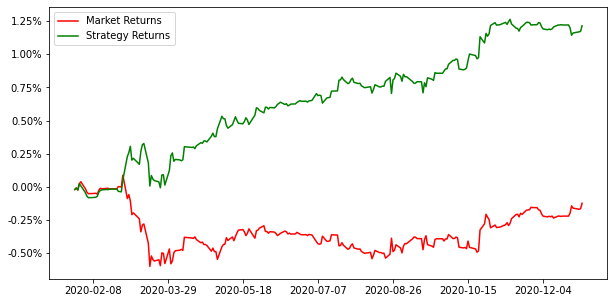

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.dates as mdates

plt.figure(figsize=(10,5))

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=50))

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())

plt.plot(trade_dataset.index.values, trade_dataset['Cumulative Market Returns'], color='r', label='Market Returns')
plt.plot(trade_dataset.index.values, trade_dataset['Cumulative Strategy Returns'], color='g', label='Strategy Returns')
plt.legend()
plt.show()

In [ ]:
trade_dataset

Open_Price  ...  Cumulative Strategy Returns
Date                    ...                             
2020-01-27       69.55  ...                    -0.020294
2020-01-28       71.10  ...                    -0.009300
2020-01-29       69.67  ...                    -0.024130
2020-01-30       70.44  ...                     0.023006
2020-01-31       69.40  ...                     0.007919
...                ...  ...                          ...
2020-12-24       58.31  ...                     1.160440
2020-12-28       61.55  ...                     1.168920
2020-12-29       60.52  ...                     1.172958
2020-12-30       60.01  ...                     1.214494
2020-12-31       60.25  ...                          NaN

[237 rows x 18 columns]

In [ ]:
df_ccc

Open_Price  Today_High  Today_Low  ...  Williams %R  Price_Rise  y_pred
Date                                           ...                                 
2016-02-16       28.28       27.50      26.60  ...       -80.59           1     NaN
2016-02-17       27.26       30.00      27.00  ...        -3.24           0     NaN
2016-02-18       29.89       30.50      27.50  ...       -51.54           1     NaN
2016-02-19       28.49       30.00      28.40  ...       -40.26           1     NaN
2016-02-22       28.93       30.50      30.00  ...       -11.79           1     NaN
...                ...         ...        ...  ...          ...         ...     ...
2020-12-24       58.31       62.00      60.00  ...        -7.69           0   False
2020-12-28       61.55       61.55      60.00  ...       -25.39           0   False
2020-12-29       60.52       61.50      58.51  ...       -36.80           1    True
2020-12-30       60.01       62.00      60.00  ...       -32.38           1    True
2020-12-31       60.25       64.00      60.00  ...       -16.12           0   False

[1185 rows x 14 columns]